## Problem Statement 1:
A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply. You are a data scientist, who has to
come up with useful insights using the data and make prediction models to forecast the sales for
X number of months/years.



1. Using the above data, come up with useful insights that can be used by each of
the stores to improve in various areas.






In [38]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')
from datetime import timedelta

Reading and Understanding the Data

In [39]:
dataset=pd.read_csv('/content/Walmart (1).csv')

In [40]:
dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [41]:
dataset.duplicated().sum()

0

In [42]:
dataset['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

EDA Exploratory Data Analysis


In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [44]:
dataset.shape

(6435, 8)

In [45]:
dataset.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [46]:
dataset.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

 Visualizing the data

Minimum sales: 209986.25


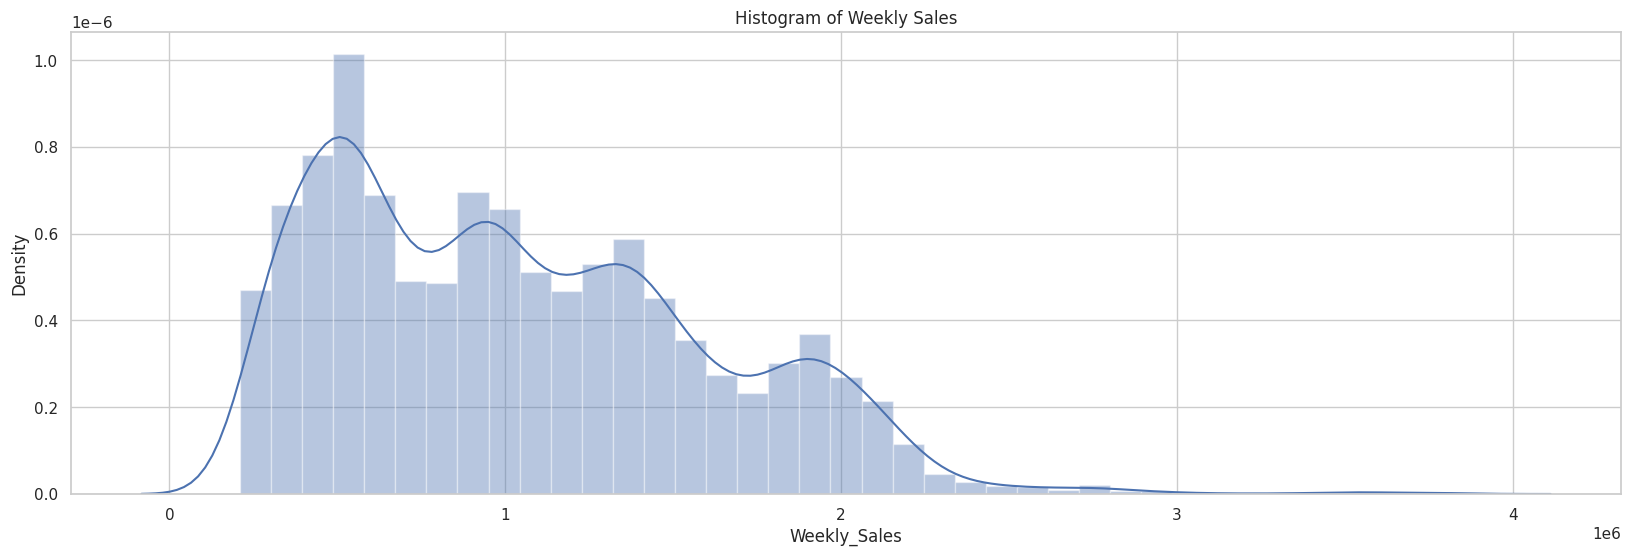

In [47]:
plt.figure(figsize=(20,6))
plt.title('Histogram of Weekly Sales')
fig = sns.distplot(dataset['Weekly_Sales'].dropna())
print('Minimum sales:', dataset['Weekly_Sales'].min())


Observation: About all sales have happened below 3000000.And it is right skewed it has some outliers



1. Using the above data, come up with useful insights that can be used by each of the stores to improve in various areas.

<Axes: title={'center': 'Store vs Weekly_Sales'}, xlabel='Store', ylabel='Weekly_Sales'>

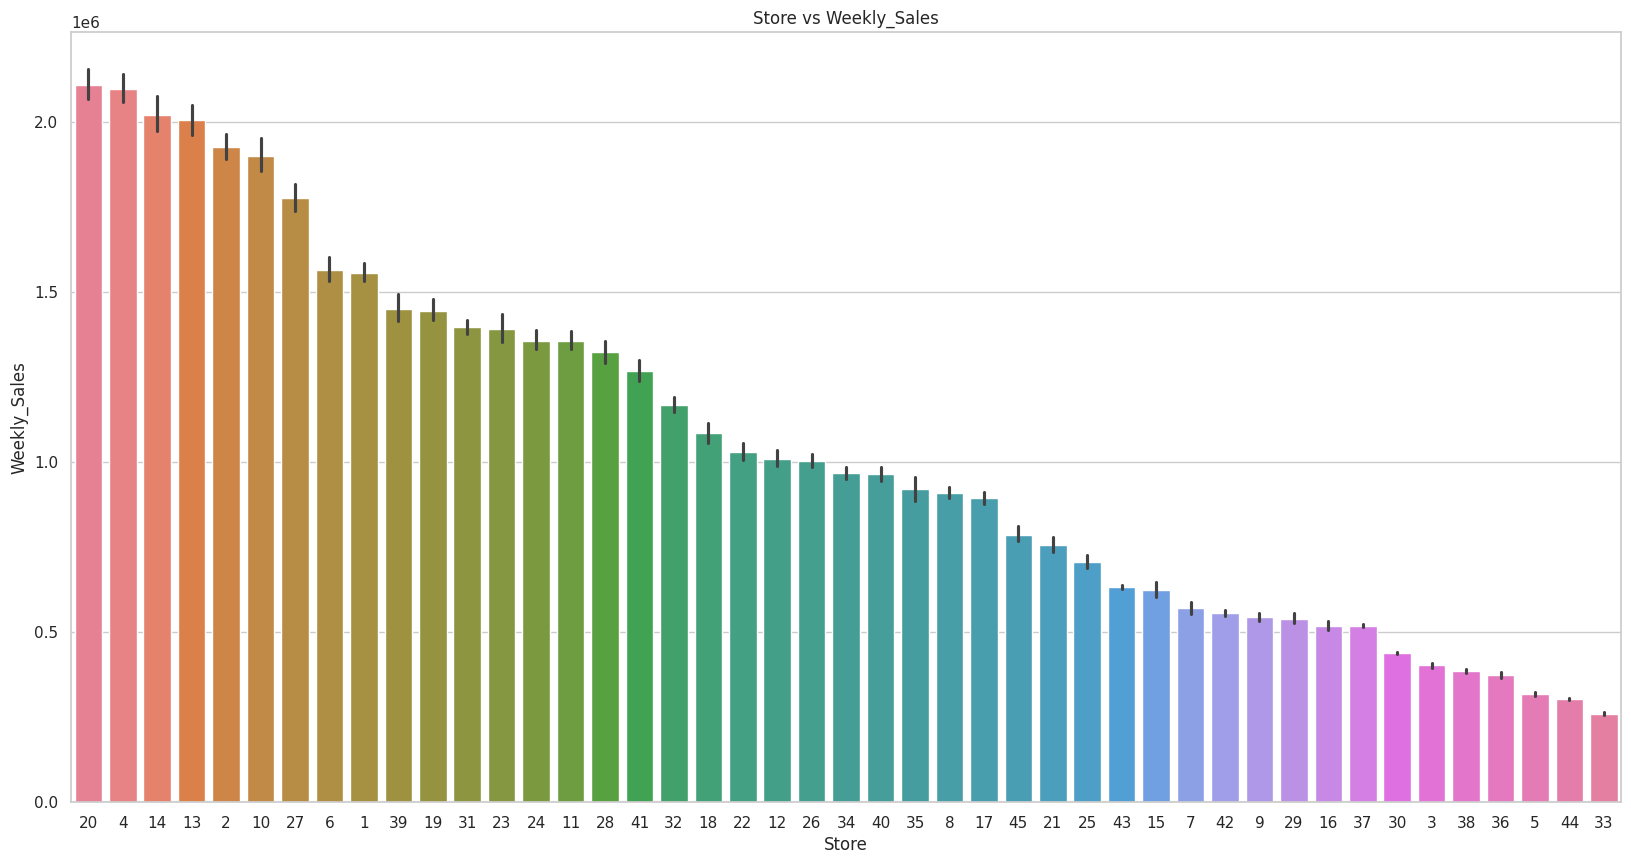

In [48]:
#weekly sales vs store

plt.figure(figsize=[20,10])
plt.title('Store vs Weekly_Sales')
df=dataset.groupby(['Store']).sum().reset_index()
sns.barplot(x= dataset.Store, y= dataset.Weekly_Sales, palette=("husl"), data=df, order=df.sort_values(by='Weekly_Sales',ascending=False)['Store'])


Stores 20 ,4 ,14 ,13 ,2 achieved the highest sales with sales over 2M while stores like 33,44,5 achieve the lowest sales with sales around 0.25M.

In [49]:
dataset['Holiday_Flag'].value_counts()

Holiday_Flag
0    5985
1     450
Name: count, dtype: int64

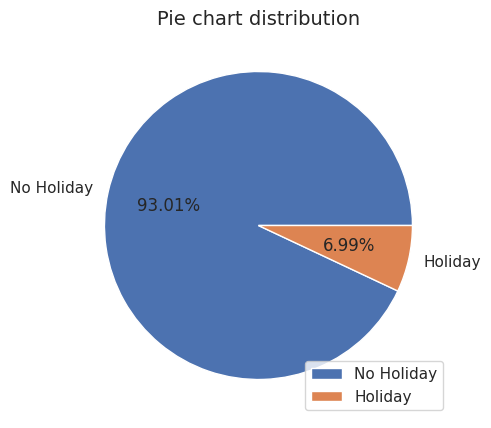

In [50]:
plt.figure(figsize=(5,5))
plt.pie(dataset['Holiday_Flag'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.title("Pie chart distribution",fontsize=14)
plt.legend()
plt.show()

In [51]:
#Bivariate Analysis

Text(0.5, 1.0, 'Scatter Plot of Temperature vs. Weekly Sales')

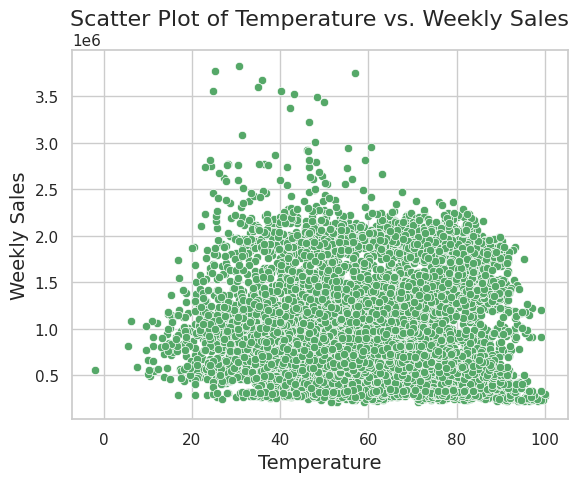

In [52]:
#Weekly Sales & Temperature Relation

sns.set(style='whitegrid')
sns.scatterplot(x='Temperature',y='Weekly_Sales',data=dataset,color='g')
plt.xlabel('Temperature', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.title('Scatter Plot of Temperature vs. Weekly Sales', fontsize=16)

Text(0.5, 1.0, 'Scatter Plot of FuelPrice vs. Weekly Sales')

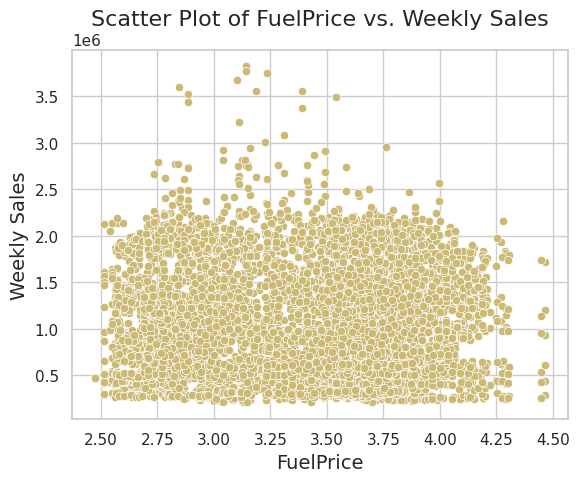

In [53]:
#Weekly Sales & Fuel Price Relation
sns.set(style='whitegrid')
sns.scatterplot(x='Fuel_Price',y='Weekly_Sales',data=dataset,color='y')
plt.xlabel('FuelPrice', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.title('Scatter Plot of FuelPrice vs. Weekly Sales', fontsize=16)

Text(0.5, 1.0, 'Scatter Plot of CPI vs. Weekly Sales')

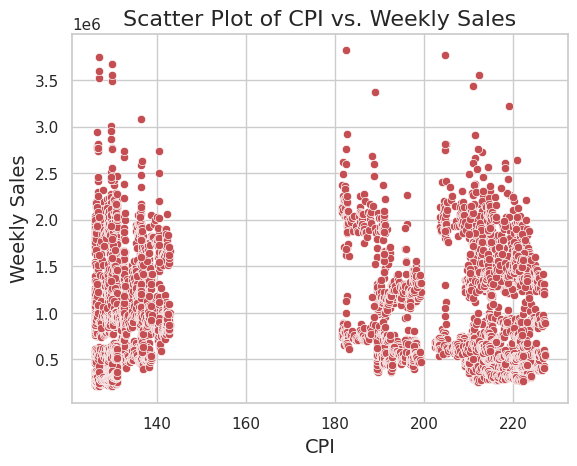

In [54]:
#Weekly Sales & Consumer Price Index Relation
sns.set(style='whitegrid')
sns.scatterplot(x='CPI',y='Weekly_Sales',data=dataset,color='r')
plt.xlabel('CPI', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.title('Scatter Plot of CPI vs. Weekly Sales', fontsize=16)

Text(0.5, 1.0, 'Scatter Plot of Unemployment vs. Weekly Sales')

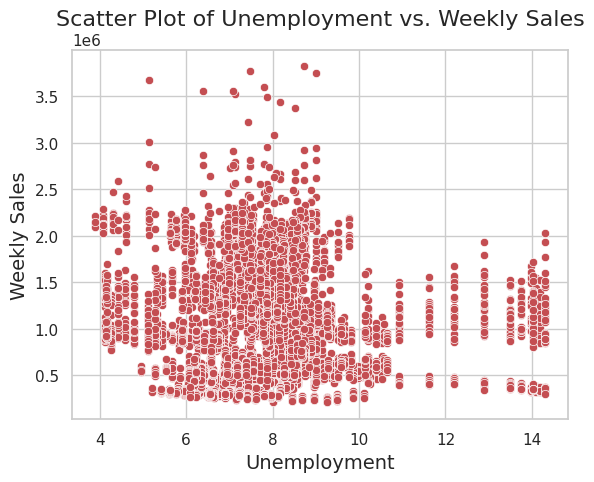

In [55]:
#Weekly Sales & Unemployment Relation
sns.set(style='whitegrid')
sns.scatterplot(x='Unemployment',y='Weekly_Sales',data=dataset,color='r')
plt.xlabel('Unemployment', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.title('Scatter Plot of Unemployment vs. Weekly Sales', fontsize=16)

Feature engineering

In [56]:
dataset.Date = pd.to_datetime(dataset.Date,format="%d-%m-%Y")
dataset['Year']  = dataset.Date.dt.year
dataset['Month'] = dataset.Date.dt.month
dataset['date']  = dataset.Date.dt.day

dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,date
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5


Now let's create new features Month,Year, Week from Date column

Weekly Sales by Year

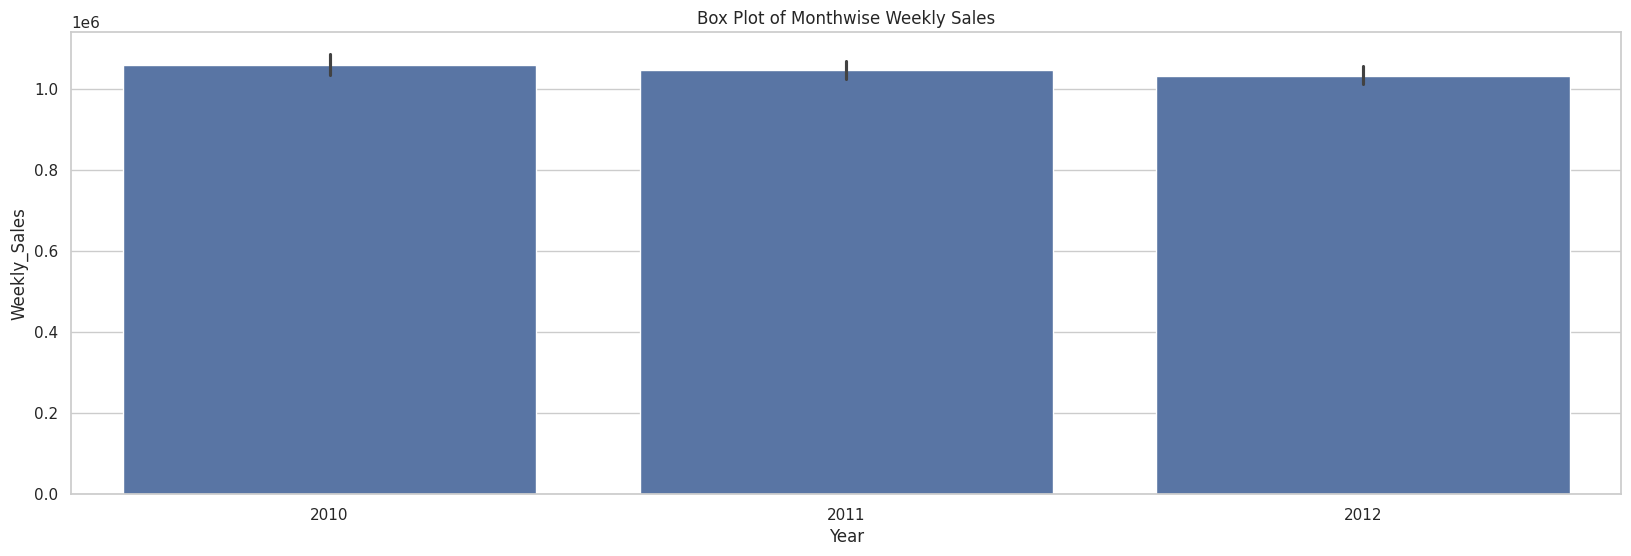

In [57]:
plt.figure(figsize=(20,6))
plt.title('Box Plot of Monthwise Weekly Sales')
fig = sns.barplot(x='Year', y='Weekly_Sales',data=dataset)

weekly Sales by Month


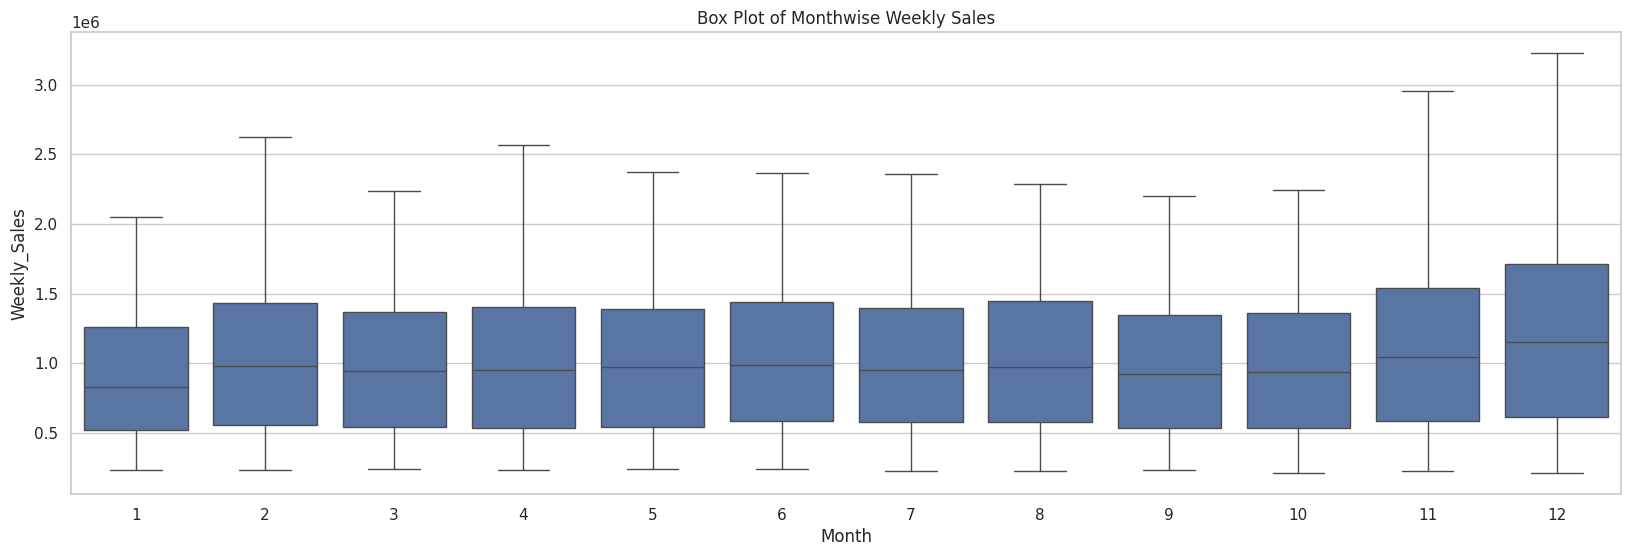

In [58]:
plt.figure(figsize=(20,6))
plt.title('Box Plot of Monthwise Weekly Sales')
fig = sns.boxplot(x='Month', y='Weekly_Sales',data=dataset , showfliers=False)

Sales are higher in Months 11 ,12

Highest sales is achieved in 51 week

Text(0.5, 1.0, 'Weekly Sales over 3 Years')

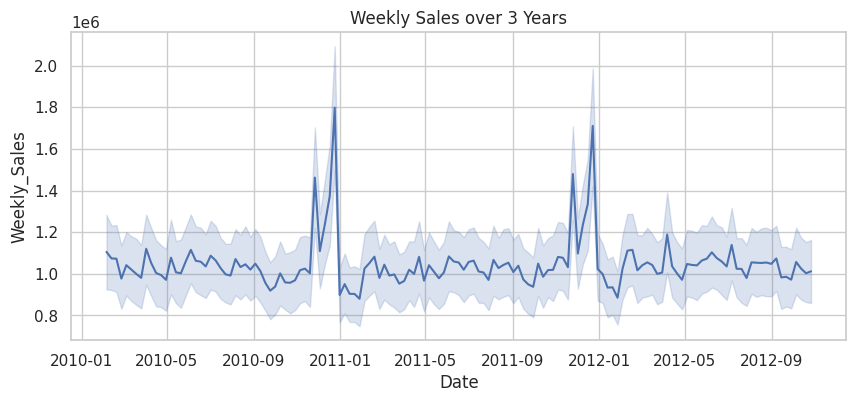

In [59]:
plt.figure(figsize=(10,4))
sns.lineplot(x=dataset["Date"],y=dataset['Weekly_Sales']);
plt.title('Weekly Sales over 3 Years')

As we observe the sales is exponential in the end of the year in 2010 and 2011

<Axes: >

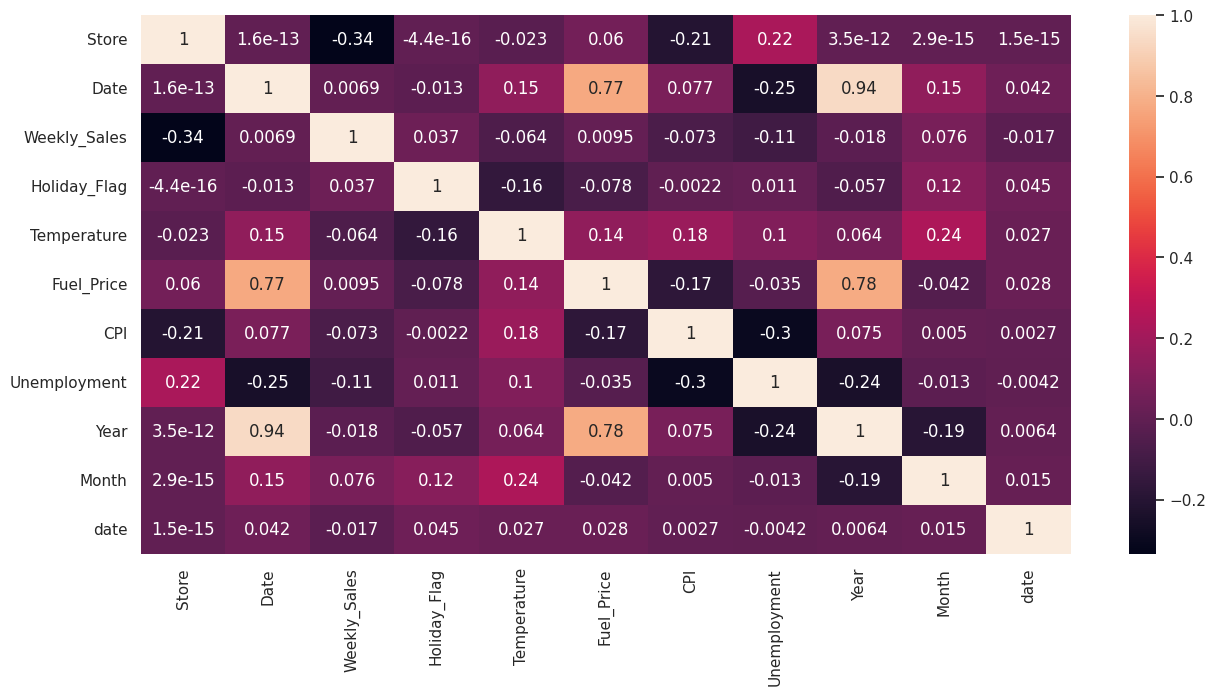

In [60]:
plt.figure(figsize=[15,7])
sns.heatmap(dataset.corr(), annot=True)

In [61]:
col=dataset.columns

In [62]:
col

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'date'],
      dtype='object')

In [63]:
#correlation of all column with respect to Weekly sales
cor1=dataset.corr().loc['Weekly_Sales']
cor1

Store          -0.335332
Date            0.006949
Weekly_Sales    1.000000
Holiday_Flag    0.036891
Temperature    -0.063810
Fuel_Price      0.009464
CPI            -0.072634
Unemployment   -0.106176
Year           -0.018378
Month           0.076143
date           -0.017409
Name: Weekly_Sales, dtype: float64

Feature selection:
List of significant variables after Visual analysis
'Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'date', 'Week'

In [73]:
dataset=dataset[['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'date']]

In [74]:
from sklearn.model_selection import train_test_split

Model Building


In [75]:
from sklearn.linear_model import LinearRegression


In [68]:
model=LinearRegression()

In [76]:
x = dataset.drop('Weekly_Sales',axis=1)
y = dataset['Weekly_Sales']

In [77]:
for i in range(len(x.columns)):
    print(i)

0
1
2
3
4
5
6
7
8


In [78]:
col_list = []
from statsmodels.stats.outliers_influence import variance_inflation_factor
for col in dataset.columns:
    if ((dataset[col].dtype != 'object') & (col != 'Weekly_Sales') ):
        col_list.append(col)

X = dataset[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

        feature         VIF
0         Store    4.468823
1  Holiday_Flag    1.140865
2   Temperature   14.521910
3    Fuel_Price   60.107994
4           CPI   25.049556
5  Unemployment   22.878344
6          Year  142.414061
7         Month    5.480125
8          date    4.223481


In [79]:
dataset=dataset.drop(['Year'], axis=1)

In [80]:
col_list = []
from statsmodels.stats.outliers_influence import variance_inflation_factor
for col in dataset.columns:
    if ((dataset[col].dtype != 'object') & (col != 'Weekly_Sales') ):
        col_list.append(col)

X = dataset[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

        feature        VIF
0         Store   4.409486
1  Holiday_Flag   1.139414
2   Temperature  14.473878
3    Fuel_Price  27.816185
4           CPI  15.019248
5  Unemployment  16.423865
6         Month   5.258666
7          date   4.156431


In [81]:
dataset=dataset.drop(['Fuel_Price'], axis=1)

In [82]:
col_list = []
from statsmodels.stats.outliers_influence import variance_inflation_factor
for col in dataset.columns:
    if ((dataset[col].dtype != 'object') & (col != 'Weekly_Sales') ):
        col_list.append(col)

X = dataset[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)


        feature        VIF
0         Store   4.246451
1  Holiday_Flag   1.139259
2   Temperature  13.629815
3           CPI  12.024059
4  Unemployment  13.251326
5         Month   5.220009
6          date   4.029131


In [83]:
dataset=dataset.drop(['Temperature'], axis=1)

In [84]:
col_list = []
from statsmodels.stats.outliers_influence import variance_inflation_factor
for col in dataset.columns:
    if ((dataset[col].dtype != 'object') & (col != 'Weekly_Sales') ):
        col_list.append(col)

X = dataset[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)


        feature        VIF
0         Store   4.245465
1  Holiday_Flag   1.093737
2           CPI   9.493540
3  Unemployment  11.599133
4         Month   4.729604
5          date   4.011437


In [85]:
dataset=dataset.drop(['Unemployment'], axis=1)

In [86]:
col_list = []
from statsmodels.stats.outliers_influence import variance_inflation_factor
for col in dataset.columns:
    if ((dataset[col].dtype != 'object') & (col != 'Weekly_Sales') ):
        col_list.append(col)

X = dataset[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)


        feature       VIF
0         Store  3.382452
1  Holiday_Flag  1.093702
2           CPI  6.802323
3         Month  4.497353
4          date  3.842107


In [88]:
x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.8, random_state=0)

In [90]:
from sklearn.metrics import *

Decision Tree


In [92]:
from sklearn.tree import DecisionTreeRegressor
dtree_tts=DecisionTreeRegressor(criterion='squared_error',max_leaf_nodes=10, random_state=0)
dtree_tts.fit(x_train, y_train)
y_predict=dtree_tts.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.5859330976290398

In [93]:
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=1000,random_state=None,min_samples_leaf=1)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9593007253137201